# 日付データ追加

**このノートブックでやること**
* データの確認
* 前処理

## インポート

In [1]:
import numpy as np
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a2_output_df.pkl')
df

,イベント,2001位,形式,日付,属性,期間
0,Stage Bye Stage,"178,840",Carnival,2019-07-02,NaN,NaN
1,TRUE COLORS,"176,743",Carnival,2019-08-31,NaN,NaN
2,夢をのぞいたら,"210,672",Carnival,2020-01-01,NaN,NaN
3,夢色ハーモニー,"45,587",Groove,2015-10-31,Vo,9日(198h)
4,流れ星キセキ,"48,673",Groove,2015-12-04,Vo,10日(222h)
...,...,...,...,...,...,...
90,Athanasia,"75,775",アタポン,2020-04-20,NaN,8日(174h)
91,不埒なCANVAS,"188,652",アタポン,2020-05-19,NaN,9日(198h)
92,Sing the Prologue♪,"85,574",アタポン,2020-06-19,NaN,8日(174h)
93,太陽の絵の具箱,"107,142",アタポン,2020-07-20,NaN,8日(174h)


## データ確認

### データ数・データ型

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   イベント    95 non-null     object
 1   2001位   95 non-null     object
 2   形式      95 non-null     object
 3   日付      95 non-null     object
 4   属性      32 non-null     object
 5   期間      92 non-null     object
dtypes: object(6)
memory usage: 4.6+ KB


In [5]:
# 2001位の列は整数型にする
df['2001位'] = df['2001位'].apply(lambda x: int(x.replace(',', '')))

In [6]:
# 期間は、カッコ内の時間を取り出す
pattern = '(?<=\().+(?=h)'
df['期間'] = df['期間'].apply(lambda x: float(re.search(pattern, x).group()) if type(x) is str else None)

In [7]:
# カテゴリ型に変更
df['属性'] = df['属性'].astype('category')
df['形式'] = df['形式'].astype('category')

In [8]:
df.dtypes

イベント       object
2001位       int64
形式       category
日付         object
属性       category
期間        float64
dtype: object

In [9]:
# 保存
save_dir = '../event_data'
df.to_pickle(save_dir + '/a3_output_df.pkl')

In [10]:
df = pd.read_pickle(save_dir + '/a3_output_df.pkl')
df

,イベント,2001位,形式,日付,属性,期間
0,Stage Bye Stage,178840,Carnival,2019-07-02,NaN,NaN
1,TRUE COLORS,176743,Carnival,2019-08-31,NaN,NaN
2,夢をのぞいたら,210672,Carnival,2020-01-01,NaN,NaN
3,夢色ハーモニー,45587,Groove,2015-10-31,Vo,198.0
4,流れ星キセキ,48673,Groove,2015-12-04,Vo,222.0
...,...,...,...,...,...,...
90,Athanasia,75775,アタポン,2020-04-20,NaN,174.0
91,不埒なCANVAS,188652,アタポン,2020-05-19,NaN,198.0
92,Sing the Prologue♪,85574,アタポン,2020-06-19,NaN,174.0
93,太陽の絵の具箱,107142,アタポン,2020-07-20,NaN,174.0


### 重複確認

In [11]:
df.drop_duplicates().count()

イベント     95
2001位    95
形式       95
日付       95
属性       32
期間       92
dtype: int64

### 欠損確認

In [12]:
df.isnull().sum()

イベント      0
2001位     0
形式        0
日付        0
属性       63
期間        3
dtype: int64

In [13]:
# 期間が欠損のものはCarnival
df.loc[df['期間'].isnull(), :]

,イベント,2001位,形式,日付,属性,期間
0,Stage Bye Stage,178840,Carnival,2019-07-02,NaN,NaN
1,TRUE COLORS,176743,Carnival,2019-08-31,NaN,NaN
2,夢をのぞいたら,210672,Carnival,2020-01-01,NaN,NaN


In [14]:
# Carnivalは期間が欠損
df.loc[df['形式']=='Carnival', :]

,イベント,2001位,形式,日付,属性,期間
0,Stage Bye Stage,178840,Carnival,2019-07-02,NaN,NaN
1,TRUE COLORS,176743,Carnival,2019-08-31,NaN,NaN
2,夢をのぞいたら,210672,Carnival,2020-01-01,NaN,NaN


### 統計量・異常値

In [15]:
# イベント名 - 重複なし
# 2001位ボーダー - 異常値はない。中央値よりも平均値が高め
# 形式 - 3種類。最大で60個重複
# 日付 - 重複なし
# 属性 - 3種類。最大で11個重複
# 期間 - 異常値はない。中央値よりも平均値が高め
df.describe(include='all')

,イベント,2001位,形式,日付,属性,期間
count,95,95.000000,95,95,32,92.000000
unique,95,NaN,3,95,3,NaN
top,情熱ファンファンファーレ,NaN,アタポン,2015-12-04,Vo,NaN
freq,1,NaN,60,1,11,NaN
mean,NaN,95234.442105,NaN,NaN,NaN,183.543478
std,NaN,42973.711653,NaN,NaN,NaN,19.116998
min,NaN,40096.000000,NaN,NaN,NaN,150.000000
25%,NaN,63761.500000,NaN,NaN,NaN,174.000000
50%,NaN,83532.000000,NaN,NaN,NaN,174.000000
75%,NaN,115178.500000,NaN,NaN,NaN,198.000000


### 分布確認

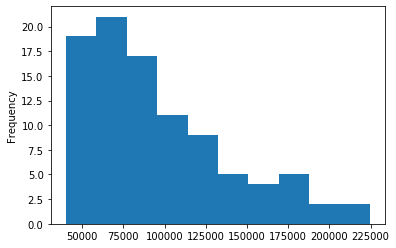

In [16]:
# 2001位ボーダー
# 右に裾が長い
df['2001位'].plot(kind='hist')

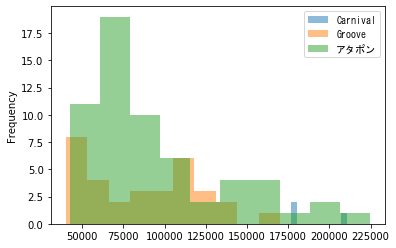

In [17]:
# 2001位ボーダー
# 形式ごとにプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    df.loc[df['形式'] == event, '2001位'].plot(kind='hist', label=event, alpha=0.5)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

In [18]:
# 属性
# Groove以外はなし
# Grooveは結構平等
df.groupby('属性').count()

,イベント,2001位,形式,日付,期間
属性,,,,,
Da,10,10,10,10,10
Vi,11,11,11,11,11
Vo,11,11,11,11,11


In [19]:
# 形式
df.groupby('形式').count()

,イベント,2001位,日付,属性,期間
形式,,,,,
Carnival,3,3,3,0,0
Groove,32,32,32,32,32
アタポン,60,60,60,0,60


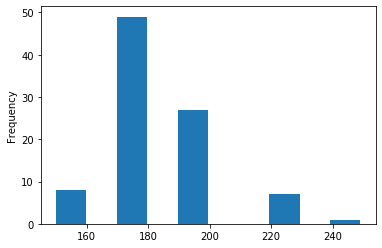

In [20]:
# 期間
df['期間'].plot(kind='hist')

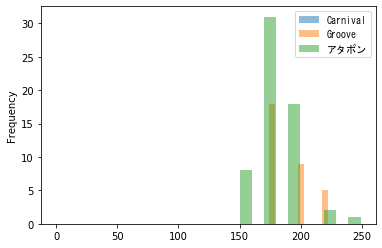

In [21]:
# 期間
# 形式ごとにプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    df.loc[df['形式'] == event, '期間'].plot(kind='hist', label=event, alpha=0.5)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()